In [1]:
import sys
sys.path.append('/Users/benj/Documents/helao-async')
from helao.helpers import logging
#if logging.LOGGER is None:
#    LOGGER = logging.make_logger(__file__)
#else:
#    LOGGER = logging.LOGGER

import os
from typing import List
from copy import copy
from helao.core.models.file import FileInfo
from helao.helpers.hlo_postprocessor import HloPostProcessor

from helao.helpers.read_hlo import read_hlo
import pandas as pd
from helao.processors.hlo_to_csv import PostProcess
from helao.helpers.read_hlo import HelaoData
from helao.helpers.parquet import read_hlo_header, read_hlo_data_chunks, hlo_to_parquet
from helao.helpers.HiSpEC_calibrate_downsample_parquet import fully_read_and_calibrate_parquet
import tempfile


2025-01-17 13:52:32,574 | INFO     | premodels :: make_logger @ logging.py:168 - Email alerts not enabled using config: {}
2025-01-17 13:52:32,575 | INFO     | premodels :: make_logger @ logging.py:170 - writing log events to /var/folders/vm/d986p9hx0rlglk34b43v_h180000gn/T/premodels.log
2025-01-17 13:52:32,744 | INFO     | hlo_to_csv :: make_logger @ logging.py:168 - Email alerts not enabled using config: {}
2025-01-17 13:52:32,745 | INFO     | hlo_to_csv :: make_logger @ logging.py:170 - writing log events to /var/folders/vm/d986p9hx0rlglk34b43v_h180000gn/T/hlo_to_csv.log


In [2]:
exp_path='/Users/benj/Documents/INST_hlo/RUNS_FINISHED/154727__manual_orch_seq__nolabel/20241115.154728__HISPEC_sub_SpEC/20241115.154728725086-exp.yml'
hd=HelaoData(exp_path)
hd.ls

hd=HelaoData(self.exp_yml_path)

# exp_path = self.exp_yml_path

experiment: HISPEC_sub_SpEC @ 2024-11-15 15:47:28.725086 CONTAINING 4 children
  [0] action: acquire @ 2024-11-15 15:47:28.789212 CONTAINING 0 children
  [1] action: wait @ 2024-11-15 15:47:34.578079 CONTAINING 0 children
  [2] action: set_digital_cycle @ 2024-11-15 15:47:35.213558 CONTAINING 0 children
  [3] action: run_CV @ 2024-11-15 15:47:35.762010 CONTAINING 0 children


In [3]:
spec_dir=hd.act[0].ymldir
cv_dir=hd.act[3].ymldir
for file in os.listdir(spec_dir):
    if file.endswith(".hlo"):
        specpath=os.path.join(spec_dir, file)
for file in os.listdir(cv_dir):
    if file.endswith(".hlo"):
        cvpath=os.path.join(cv_dir, file)

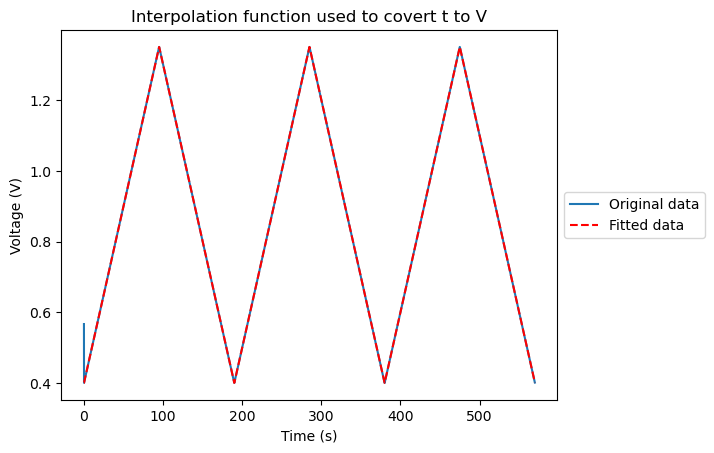

<class 'list'>
<class 'numpy.float64'>
<class 'list'>
<class 'numpy.float64'>
<class 'list'>
<class 'numpy.float64'>


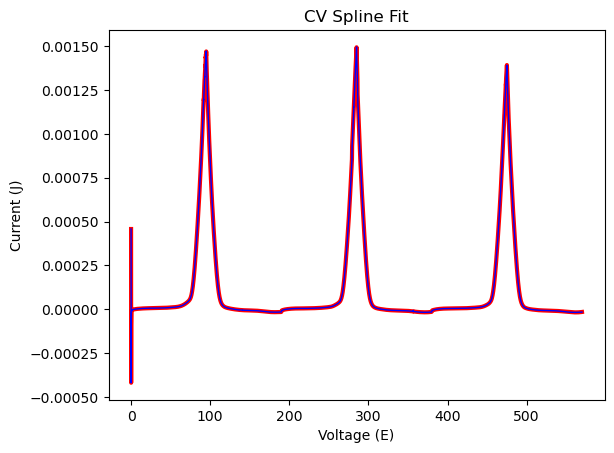

In [4]:
with tempfile.NamedTemporaryFile(mode='w+', delete=False, suffix='.csv') as temp_file:
    hlo_to_parquet(specpath, temp_file.name, HiSpEC=True)
    test=fully_read_and_calibrate_parquet(cv_path=cvpath, spec_path=temp_file.name, write_file=False).sort_values(by='t (s)')
